# Project: Suicide Deaths Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

With suicides becoming so normal these days, affecting people of all classes, poor or rich, I present to you my project on this topic. In this project, we'll be analyzing data associated with suicides for the countries in the dataset. In particular, we'll be interested in finding out the trends among the type of generation, sex, population and the age range concerned with suicidal mishappenings. 

The dataset consists of the following attributes:
- Country
- Year
- Sex
- Age: The age groups
- Suicide no.: The number of suicides
- Population
- Suicides/100k pop: Number of suicides per 100k population
- Generation: The type of generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
#looking for null data
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Data Cleaning 

In [3]:
#Dropping unwanted columns
df.drop(['country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)'], inplace=True, axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Boomers


In [7]:
#The types of Generations
df.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [8]:
#The Age-Range
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [9]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,generation
272,Antigua and Barbuda,1985,male,35-54 years,0,5970,0.00,Silent
10545,Grenada,2003,female,75+ years,0,2362,0.00,Silent
13931,Kazakhstan,2006,male,55-74 years,436,730464,59.69,Silent
24870,Switzerland,2007,male,75+ years,191,220706,86.54,Silent
14208,Kuwait,1987,female,25-34 years,1,150100,0.67,Boomers


<a id='eda'></a>
## Exploratory Data Analysis


### Has the number of suicides been increasing?

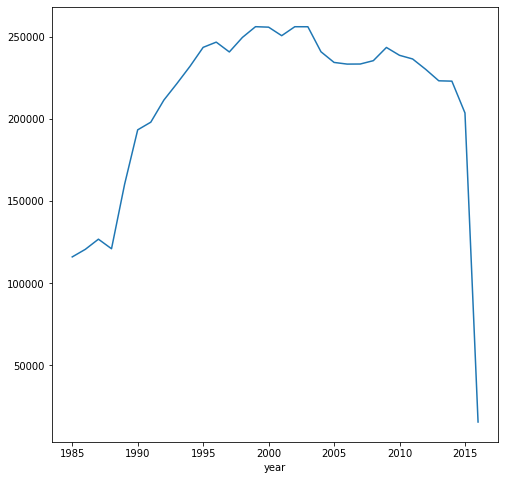

In [6]:
df.groupby('year')['suicides_no'].sum().plot(kind = 'line', figsize =(8,8));

Here, we can see that from *1985* to around *1987*, there is an average of *115000* nummber of suicides. After that period there is a sudden increase and from the year *1995-2003* we have seen the highest number of suicides with an average of *225000* number of suicides. There has been a slight decrease after that but the numbers are still huge.

### Which gender has more number of suicides?

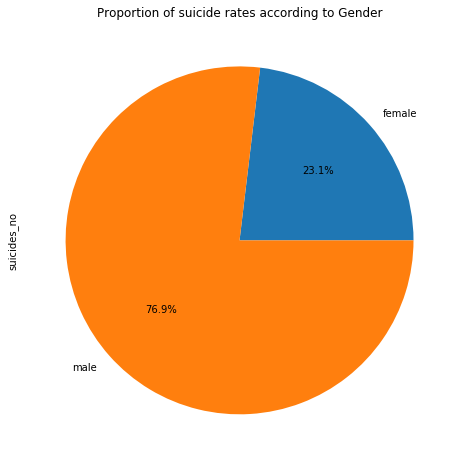

In [9]:
df.groupby('sex')['suicides_no'].sum().plot(kind = 'pie', autopct='%1.1f%%', figsize = (8,8));
plt.title('Proportion of suicide rates according to Gender');

In [10]:
df.groupby('sex')['suicides_no'].sum()

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

Here, as we can see, the males have more number of suicides than the females. Males have approximately **5188910** number of suicides and the females have around **1559510**. 

### Which age group is the most suicidal?

**Plotting Graph:**

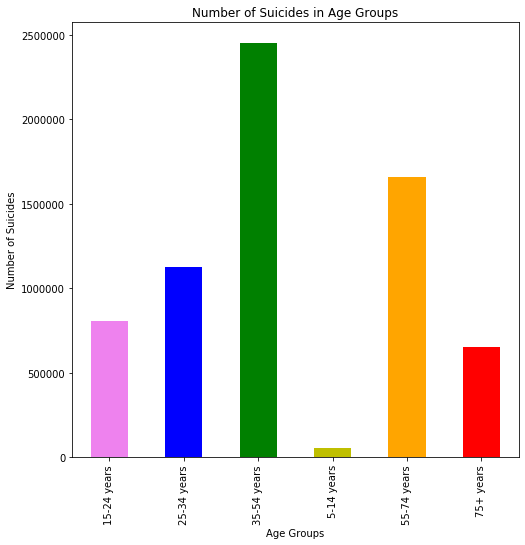

In [13]:
#groupby:
df.groupby('age')['suicides_no'].sum().plot(kind = 'bar', color = ['violet', 'blue', 'g', 'y', 'orange', 'r'], figsize =(8,8));
plt.title('Number of Suicides in Age Groups');
plt.xlabel('Age Groups');
plt.ylabel('Number of Suicides');    

The age group of **35-54 years** is the most suicidal with a clear difference as shown in the graph.

Rest are as follows(*most-least*):
55-74 years,
25-34 years,
15-24 years,
75+ years,
and finally 5-14 years.

### Which gender has more number of suicides in the age groups?

Firstly I'll have to create a pivot table containing every age group, and then make a bar chart for the number of male and female suicides in each age group.

In [14]:
pd.pivot_table(df, index='age', values='suicides_no', columns='sex',aggfunc=lambda x: x.sum())

sex,female,male
age,,
15-24 years,175437,633105
25-34 years,208823,915089
35-54 years,506233,1945908
5-14 years,16997,35267
55-74 years,430036,1228407
75+ years,221984,431134


**Plotting Graphs:**

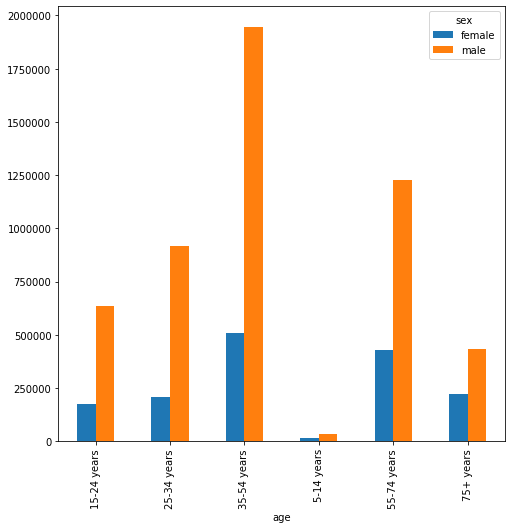

In [16]:
pd.pivot_table(df, index='age', values='suicides_no', columns='sex',aggfunc=lambda x: x.sum()).plot(kind='bar', figsize=(8,8));

In all the age groups, the male gender has been more suicidal than the female. With a clear difference as seen in the bar charts, even in the age group of **5-14 years**, the males are more suicidal than the females.

**Checkpoint**

In [156]:
df.to_csv('master_edited.csv', index = False)

In [3]:
df = pd.read_csv('master_edited.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Boomers


### Have the generations been of some influence to these suicides?

In [15]:
generations_no = []
for i in df['generation'].unique():
    generations_no.append(sum(df[df['generation'] == i]['suicides_no']))

In [16]:
generations = df['generation'].unique()

**Plotting Graph:**

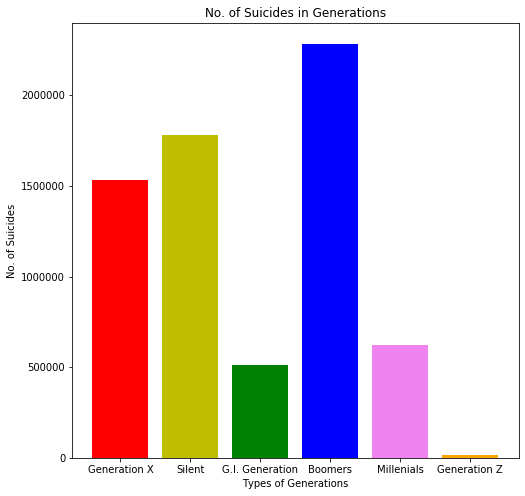

In [30]:
plt.figure(figsize=(8,8));
plt.bar(generations, generations_no, color = ['r', 'y', 'g', 'blue', 'violet', 'orange']);
plt.xlabel('Types of Generations');
plt.ylabel('No. of Suicides');
plt.title('No. of Suicides in Generations');


With this question I wanted to know whether the generations have an effect on the number of suicides and as we can see the **Boomers** are clearly the most suicidal amongst all with more than *200000* suicides, followed by **Silent** and **Generation X**. **Generation Z** seems to be the least influenced.

### Which countries are top 10  in the number of suicides? 

In [35]:
country_no = []
for i in df['country'].unique():
    country_no.append(sum(df[df['country'] == i]['suicides_no']))

In [37]:
df_country = pd.DataFrame(country_no, columns=['country_no'])
df_country['country'] = df['country'].unique()

**Extracting the top 10 countries for most number of suicides:**

In [62]:
df_top10 = df_country.nlargest(10, ['country_no'])
df_top10.sort_values(by=['country_no'], ascending=False)

,country_no,country
75,1209742,Russian Federation
98,1034013,United States
46,806902,Japan
33,329127,France
95,319950,Ukraine
35,291262,Germany
73,261730,Republic of Korea
15,226613,Brazil
69,139098,Poland
97,136805,United Kingdom


**Plotting graph:**

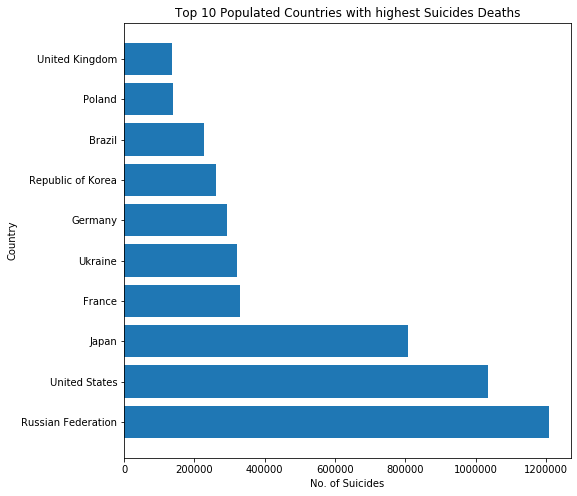

In [63]:
x = df_top10['country']
y = df_top10['country_no']

plt.figure(figsize=(8, 8));
plt.barh(x, y);
plt.xlabel('No. of Suicides');
plt.ylabel('Country');
plt.title('Top 10 Populated Countries with highest Suicides Deaths');

**The Russian Federation** seems to have the most number of suicides followed by the **United States**. The least influenced countries are **United Kingdom** and **Poland**.

Now, with the help of the number of suicides/100k of population data, provided in the dataset, I will extract the said data, in terms of **suicides/100k Population**:

In [64]:
country_no2 = []
for i in df['country'].unique():
    country_no2.append(sum(df[df['country'] == i]['suicides/100k pop']))
    
df_country2 = pd.DataFrame(country_no2, columns=['country_no'])
df_country2['country'] = df['country'].unique()

**Extracting top 10 countries with most number of suicides/100k Population:**

In [67]:
df_top15 = df_country2.nlargest(15, ['country_no'])
df_top15.sort_values(by=['country_no'], ascending=False)

,country_no,country
75,11305.13,Russian Federation
52,10588.88,Lithuania
40,10156.07,Hungary
47,9519.52,Kazakhstan
73,9350.45,Republic of Korea
6,9076.23,Austria
95,8931.66,Ukraine
46,8025.23,Japan
32,7924.11,Finland
12,7900.50,Belgium


**Plotting Graph:**

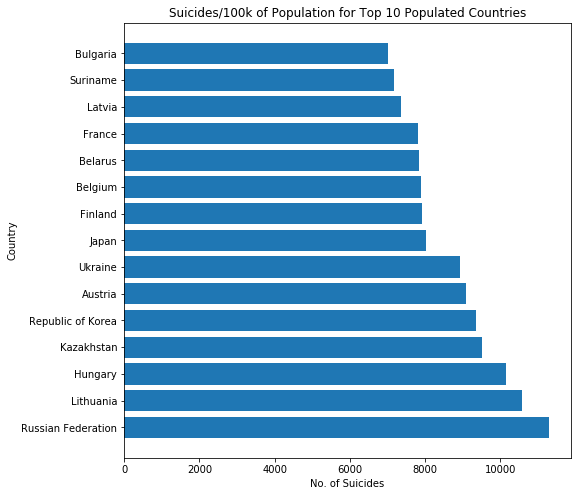

In [68]:
x = df_top15['country']
y = df_top15['country_no']

plt.figure(figsize=(8, 8))
plt.barh(x, y);
plt.xlabel('No. of Suicides');
plt.ylabel('Country');
plt.title('Suicides/100k of Population for Top 10 Populated Countries');

As you can see the graph has changed a bit, however **Russian Federation** still remains to be at the top. The least influenced seems to be **Bulgaria**.

In [18]:
df.to_csv('master_edited.csv', index = False)

<a id='conclusions'></a>
## Conclusions

I would like to conclude my project as I have answered all the questions. With the help of the data provided by *kaggle*, I have found out the following:

- The number of suicides have been increasing. The time period of *1995-2003* has witnessed the most number of suicides with an average of  225000 number of suicides.
- Males are more suicidal than females regardless of the age group. Even in the age group of 5-14 years, male were more influenced.
- The age group that has the most number of suicides is 35-54 years, and the least is 5-14 years.
- The generations are well influenced by the suicides. With *Boomers* being the most influencial amongst all others and *generation Z* being the least.
- *The Russian Federation* has the most number of suicides and suicides/100k of population. *United Kingdom* has the least number of suicides and *Bulgaria* has the least number of suicides/100k population.

**Limitations:**

If there was more information on why the suicides were happening, the causes of the suicides, that could help determine what causes are more common and what are not. This can be helpful in the analysis and also to various organisations in order to work on to reduce such cases. With this, I could have integrated this data with various other variables, for example, *Age Group*: to know which group is more associated with which cause, or *Generations*: to know which generations are most influenced with which type of cause.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0